# 因子分析

**因子分析**（factor analysis）はデータの分散を分解することによって何らかの共通性を抽出する手法である。

心理学などの分野において、「リーダシップ」や「社交性」のような直接観測することができない**構成概念**（construct）を抽出するために用いられる。



## 因子分析モデル

### 1因子モデル

$p$次元の観測値が$n$個得られているとし、$i$番目の$j$次元のデータを$x_{ij}$と表すことにする。$x_{ij}$を標準化して平均0、分散1にしたデータを$z_{ij}$と表すことにする。

1因子モデルは標準化データを次のように分解するモデルである。

$$
z_{ij} = a_j f_i + d_j u_{ij}
$$

ここで

- $f_i$は観測対象$i$の**共通因子**（common factor）で、構成概念を表す
- $u_{ij}$は**独自因子**（unique factor）と呼ばれ、構成概念で説明しきれない要因を表す
- $a_j$は観測変数$j$の**因子負荷**（factor loading）で、観測変数$j$が共通因子から受ける影響の程度を表す
- $d_j$は観測変数$j$の**独自係数**と呼ばれ、観測変数$j$が独自因子から受ける影響の程度を表す


### $m$因子モデル

$m$個の因子を扱うように拡張すると


$$
\begin{align}
z_{ij}
&= a_{j1} f_{i1} + \cdots + a_{jm} f_{im} + d_j u_{ij}\\
&= \sum^m_{l=1} a_{jl} f_{il} + d_j u_{ij}\\
\end{align}
$$

と表すことができる。

In [28]:
import pandas as pd

# テストの点数データ
scores = pd.DataFrame([
    {"英語": 98, "国語": 95, "数学": 75},
    {"英語": 90, "国語": 75, "数学": 70},
    {"英語": 60, "国語": 57, "数学": 80},
    {"英語": 50, "国語": 70, "数学": 60},
    {"英語": 30, "国語": 50, "数学": 40},
])
Z = (scores - scores.mean()) / scores.std()

from statsmodels.multivariate.factor import Factor

fa = Factor(Z, n_factor=1, method="ml").fit()
fa.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/multivariate/factor.py:419: UserWarning: Fitting did not converge
  warnings.warn("Fitting did not converge")


<class 'statsmodels.iolib.summary2.Summary'>
"""
Factor analysis results
=======================
                       
-----------------------
    Communality        
------------------------
    英語      国語      数学  
------------------------
  0.9977  0.7723  0.5347
-----------------------
                       
-----------------------
 Pre-rotated loadings  
-----------------------
               factor 0
-----------------------
英語               0.9995
国語               0.8719
数学               0.7180
-----------------------
                       
=======================

"""

In [31]:
fa.uniqueness

array([0.00228581, 0.22772564, 0.46534024])

In [36]:
# 共通因子スコア
fa.factor_scoring(Z)

array([[ 1.15171807],
       [ 0.85998399],
       [-0.19932969],
       [-0.54814633],
       [-1.26422604]])

## 主成分分析との違い

主成分分析も分散を分解して共通した成分を取り出す手法であり、因子分析と似ているが、誤差を分離するかどうかが異なる。

因子分析は観測変数を共通した部分と誤差とに分解した上で共通因子を抽出するのに対し、主成分分析は誤差の分離を行わずに共通した部分を取り出そうとする。


## 妥当性と信頼性


### 信頼性係数

真の得点の分散の、テスト得点の分散に対する比を、テスト得点$y$の **信頼性係数 (reliability coefficient)** という。

$$
\rho=\frac{\sigma_t^2}{\sigma_y^2}
=\frac{\sigma_t^2}{\sigma_t^2+\sigma_e^2}=1-\frac{\sigma_e^2}{\sigma_y^2}
$$

信頼性係数は測定の誤差分散が小さいほど1に近い値をとり、誤差分散が大きいとき0に近い値をとる。

### クロンバックの$\alpha$係数

信頼性係数$\rho$は母集団レベルの話であり、標本の情報から推定するには別の値を使う。
信頼性係数の推定方法はいくつかあるが、「項目を超えた一貫性」に関する検討を行うクロンバックのα係数が代表的。

「項目を超えた一貫性」とは「テストに含まれる項目群を、同様の別の項目群に置き換えても結果は安定しているか」という考え方で、そういう意味での信頼性を近似的に与える指標がクロンバックのα係数である。

:::{card} クロンバックの$\alpha$

$$
\alpha=\frac{J}{J-1}\left(1-\frac{\sum_{j=1}^J s_j^2}{s_y^2}\right)
$$

- $J$：項目数
- $s_y^2$：テスト得点の分散
- $s_j^2$：項目$j$の分散

:::


$\alpha$係数は

- 項目間の相関が高いとき
- 項目数が多いとき

に高い値をとる。項目が多いだけでも高くなってしまうので注意が必要で参考程度に用いられる。


測定の標準誤差（SEM）は信頼性係数の推定値$\hat\rho$を用いて推定される。

:::{card} 測定の標準誤差（SEM）の推定量

$$
\operatorname{SEM} = s_y \sqrt{1-\hat{\rho}}
$$

:::



:::{note}

こうしたCTTの信頼性係数や測定の標準誤差の注意点は

- 1つのテスト & 1つの受験者集団ごとに算出される
- 異なる受験者集団に対して測定の標準誤差を求めると、異なる値が得られる（標本依存性）

:::



### Messickの妥当性概念

Messickは妥当性検証のための側面を6つ挙げた。

| 側面（facet）                      | 内容（簡潔な説明）                                           |
| ---------------------------------- | ------------------------------------------------------------ |
| ① 内容的妥当性（Content）          | 測定内容が理論的構成概念をどれだけ網羅しているか             |
| ② 構成概念妥当性（Substantive）    | 測定が理論に基づき、認知的に妥当か                           |
| ③ 構造的妥当性（Structural）       | 得点構造が想定した構成概念と整合しているか（因子構造など）   |
| ④ 外的妥当性（External）           | 他の指標との関係が理論通りか（収束的・弁別的妥当性）         |
| ⑤ 結果的妥当性（Consequential）    | 測定の利用が社会的に望ましい結果をもたらすか（公正性・偏りなど） |
| ⑥ 実証的妥当性（Generalizability） | 測定結果が一般化可能か（状況・集団を超えて妥当か）           |

上記6つの側面にわたる証拠が備えられていることが望ましい。しかし妥当性検証とは尺度が利用されることで明らかになる証拠を積み重ねるプロセスであるため、最初から全部を備えることは不可能。

## 探索的因子分析

**探索的因子分析**（exploratory factor analysis: EFA）は、因子と観測変数の関係についての仮説や制約を置かずに、観測変数のみから相関係数を計算し、観測変数間に相関関係をもたらす因子を推定する方法。

たとえばモデルの因子の数は固有値から探索して決める。例えば「1より大きい固有値をもつ因子を採用する」とする（Guttman基準）



#### サンプルデータを生成して因子分析を実行してみる

In [42]:
import numpy as np
import pandas as pd

def generate_factor_analysis_data(n_samples=500, n_variables=6, n_factors=2, noise_std=0.3, random_state=42):
    """因子分析のサンプルデータを生成する"""
    np.random.seed(random_state)

    # 因子負荷量行列（loadings）: n_variables × n_factors
    loadings = np.zeros((n_variables, n_factors))
    loadings[:3, 0] = np.random.uniform(0.6, 0.9, size=3)  # 因子1に対応する変数
    loadings[3:, 1] = np.random.uniform(0.6, 0.9, size=3)  # 因子2に対応する変数

    # 潜在因子スコア（factors）: n_samples × n_factors
    factors = np.random.normal(size=(n_samples, n_factors))

    # ノイズ項（ユニーク性）： n_samples × n_variables
    noise = np.random.normal(scale=noise_std, size=(n_samples, n_variables))

    # 観測変数: n_samples × n_variables
    data = factors @ loadings.T + noise

    # データフレームに変換
    columns = [f"X{i+1}" for i in range(n_variables)]
    df = pd.DataFrame(data, columns=columns)
    return df

# サンプルデータ生成
df = generate_factor_analysis_data()
df.head().style.set_caption("サンプルデータの最初の5行")

,X1,X2,X3,X4,X5,X6
0,1.393529,1.588493,1.609186,0.437720,0.891599,0.555655
1,0.288143,-0.622342,0.136009,0.482352,0.155505,0.205761
2,-0.426225,-0.282974,-0.222966,-0.535192,-0.308543,0.341448
3,0.690628,0.345086,0.209713,-1.455579,-1.053465,-1.544344
4,-1.305979,-2.027497,-1.293973,-0.244199,-0.508647,0.108509


[factor-analyzer](https://pypi.org/project/factor-analyzer/)パッケージを使うとRと同程度の因子分析を行うことができる

In [57]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, rotation='promax', method='ml', is_corr_matrix=False)
fa.fit(df)

# 因子負荷量（loadings）
loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns=["第1因子", "第2因子"])
loadings.style.set_caption("因子負荷量")

/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,第1因子,第2因子
X1,0.918171,0.005622
X2,0.951064,-0.004977
X3,0.928033,-0.001037
X4,-0.031509,0.923027
X5,-0.001492,0.908985
X6,0.032577,0.912851


固有値を高い順に並べる **スクリープロット** でも因子数は2が妥当だと明確に出ている

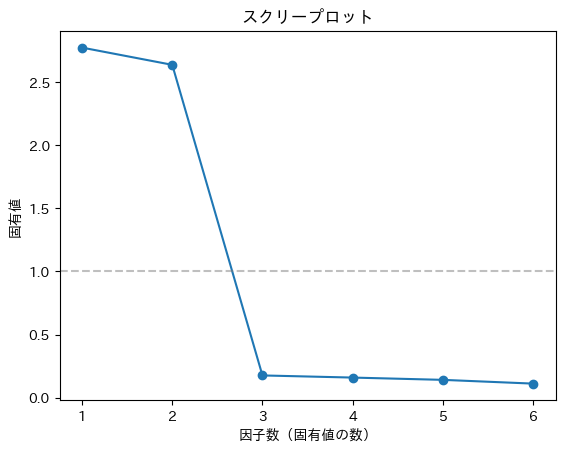

In [49]:
# スクリープロットで因子数を探索
eigen = fa.get_eigenvalues()
left = list(range(1, len(eigen[0])+1))
fig, ax = plt.subplots()
ax.plot(left, eigen[0], marker="o")
ax.set(xlabel="因子数（固有値の数）", ylabel="固有値", title="スクリープロット")
ax.axhline(y=1, color="gray", linestyle="--", alpha=0.5)
fig.show()

FactorAnalysisはscikit-learnにもあるが結構変な値になる。推定方法が違ったりするため？

In [39]:
# 2因子モデルで因子分析を実行（scikit-learn）
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2, random_state=0, rotation="varimax")
X_fa = fa.fit_transform(df)

# 因子負荷量（loadings）
loadings = fa.components_.T  # shape: (n_variables, n_factors)
pd.DataFrame(loadings, index=df.columns, columns=["第1因子", "第2因子"]).style.set_caption("因子負荷量")

,第1因子,第2因子
X1,-0.689410,-0.003139
X2,-0.865541,-0.013791
X3,-0.775908,-0.009166
X4,0.035851,0.774969
X5,0.008879,0.641599
X6,-0.015767,0.671648


## 確認的因子分析

**確認的因子分析**（confirmatory factor analysis: CFA）は、因子の数や観測変数との関係性などについての仮説（モデル）をあらかじめ立てておき、その仮説の正しさを検証するためにモデルをデータにあてはめていく。

その妥当性はデータの分散をモデルがどれだけ説明できたか（適合度）の指標などによって確認される。


In [3]:
import semopy

## カテゴリカル因子分析

通常の因子分析では、観測変数も連続値（正規分布を仮定）であることを前提にしている。しかし実際の調査データでは、

- 「1（全くそう思わない）」〜「5（非常にそう思う）」のリッカート尺度
- 「ある／ない」「はい／いいえ」の2値データ
- 評価カテゴリ（例：低・中・高）

といった順序尺度のカテゴリカル変数が含まれることがある。

因子分析では相関行列をもとに計算できるため、カテゴリカル変数であっても相関関係へと変換してから扱えば通常の計算手続きに持ち込むことができる。

カテゴリカル変数の相関関係には「観測値はカテゴリカル変数だが、その背後には連続値の潜在変数があり、ある閾値をこえるかどうかで離散的な観測値になっている」という考え方で統計モデルを組んで相関係数を算出するタイプのものが存在する。この仮定は因子分析モデルの仮定（離散値の背後には潜在的な因子スコアが存在する）とも整合的なのでそういった相関係数が使われる。具体的には、

- 連続変数 × カテゴリカル変数 の相関 → **ポリシリアル（polyserial）相関係数**
- カテゴリカル変数 × カテゴリカル変数 の相関 → **ポリコリック（polychoric）相関係数**

が使われる。Pythonだと [ordinalcorr](https://pypi.org/project/ordinalcorr/) パッケージで計算できる。


#### 実装例

先程のサンプルデータを離散化してみる

In [51]:
def discretize_to_categorical(df, n_bins=4, labels=None):
    """
    各列をカテゴリカルに変換（等頻度ビンに分割）
    
    Parameters:
        df: pd.DataFrame - 入力の連続値データ
        n_bins: int - ビンの数（カテゴリ数）
        labels: list or None - カテゴリラベル。Noneなら自動で0～(n_bins-1)

    Returns:
        pd.DataFrame - カテゴリカル変数データ
    """
    if labels is None:
        labels = list(range(n_bins))

    df_cat = df.copy()
    for col in df.columns:
        df_cat[col] = pd.qcut(df[col], q=n_bins, labels=labels)
    return df_cat

# カテゴリカルに変換
df_cat = discretize_to_categorical(df)
df_cat.head().style.set_caption("サンプルデータの最初の5行")

,X1,X2,X3,X4,X5,X6
0,3,3,3,2,3,3
1,2,0,2,2,2,2
2,1,1,1,1,1,2
3,3,2,2,0,0,0
4,0,0,0,1,0,2


相関行列に変換する

In [54]:
from ordinalcorr import hetcor
corr_matrix = hetcor(df_cat)
corr_matrix

,X1,X2,X3,X4,X5,X6
X1,1.000000,0.874632,0.834441,-0.065471,0.028831,0.021962
X2,0.874632,1.000000,0.877763,-0.070279,-0.009727,0.012020
X3,0.834441,0.877763,1.000000,-0.051655,-0.005921,0.010932
X4,-0.065471,-0.070279,-0.051655,1.000000,0.832004,0.846709
X5,0.028831,-0.009727,-0.005921,0.832004,1.000000,0.822339
X6,0.021962,0.012020,0.010932,0.846709,0.822339,1.000000


FactorAnalyzerで`is_corr_matrix=True`を指定して相関行列を入力データとして渡すようにする

In [59]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, rotation='promax', method='ml', is_corr_matrix=True)
fa.fit(corr_matrix)

# 因子負荷量（loadings）
pd.DataFrame(fa.loadings_, index=df.columns, columns=["第1因子", "第2因子"]).style.set_caption("因子負荷量（カテゴリカル）")

/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,第1因子,第2因子
X1,0.912573,0.008262
X2,0.958998,-0.007947
X3,0.914651,-0.000145
X4,-0.051254,0.926265
X5,0.017502,0.898729
X6,0.032526,0.915416


もそもとの連続変数での推定結果とある程度近い推定値となっていることがわかる

In [61]:
loadings.style.set_caption("因子負荷量（連続変数）")

,第1因子,第2因子
X1,0.918171,0.005622
X2,0.951064,-0.004977
X3,0.928033,-0.001037
X4,-0.031509,0.923027
X5,-0.001492,0.908985
X6,0.032577,0.912851


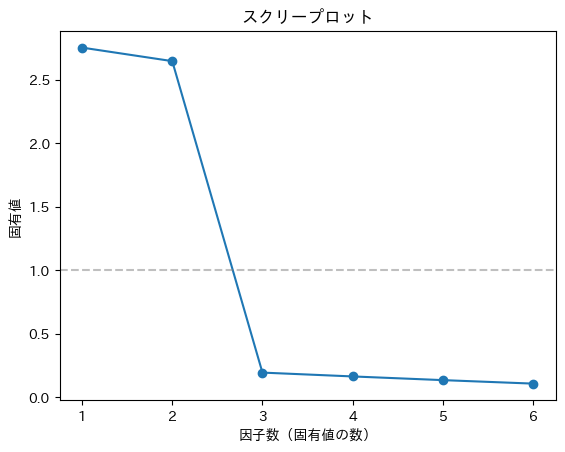

In [56]:
# スクリープロットで因子数を探索
eigen = fa.get_eigenvalues()
left = list(range(1, len(eigen[0])+1))
fig, ax = plt.subplots()
ax.plot(left, eigen[0], marker="o")
ax.set(xlabel="因子数（固有値の数）", ylabel="固有値", title="スクリープロット")
ax.axhline(y=1, color="gray", linestyle="--", alpha=0.5)
fig.show()

## 参考

- Hofacker, C. (2004). Exploratory Factor Analysis, Mathematical Marketing. http://www.openaccesstexts.org/pdf/Quant_Chapter_11_efa.pdf
- J Bai, K Li (2012). Statistical analysis of factor models of high dimension. Annals of Statistics. https://arxiv.org/pdf/1205.6617.pdf